In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.models import load_model

<h1>Load Best Model</h1>

In [2]:
best_network = load_model("best_network.h5")

<h1>Load in example Images</h1>

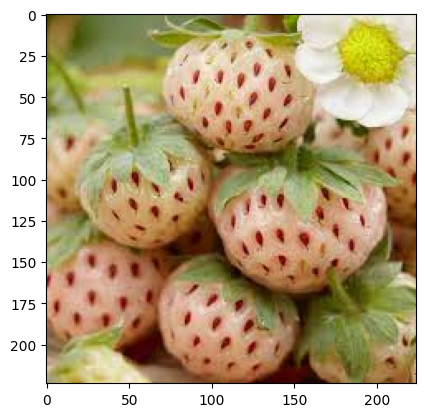

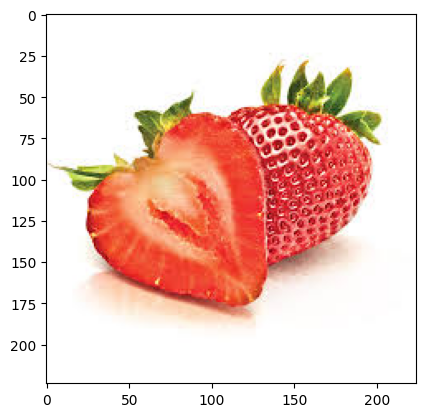

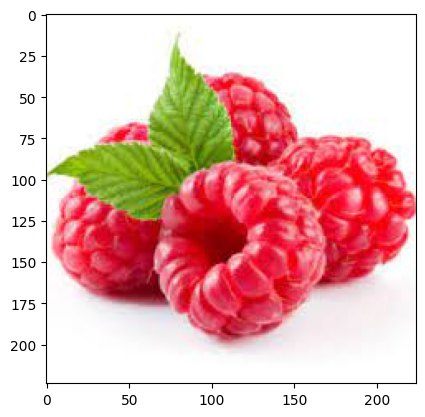

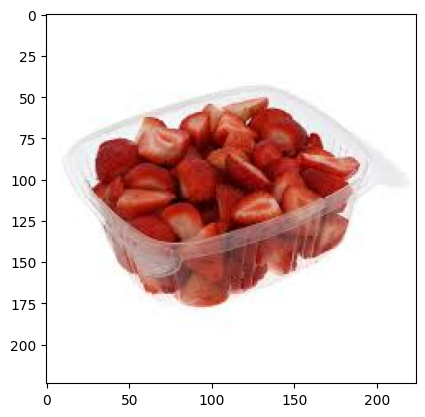

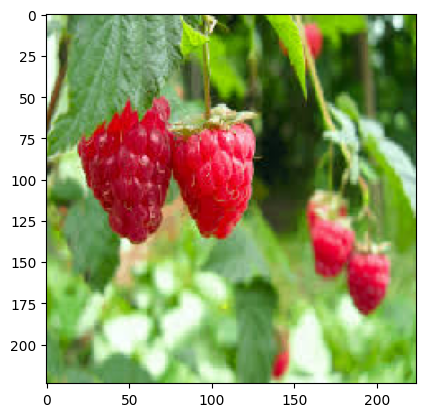

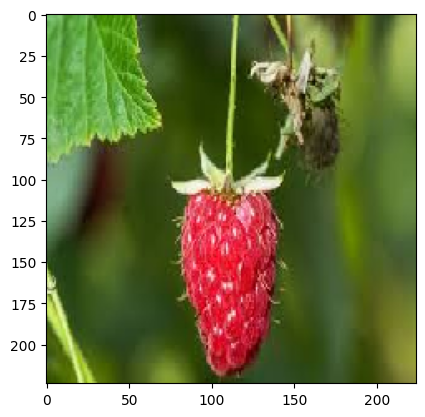

In [3]:
path = "examples"
pathnames = [os.path.join(path, filename) for filename in sorted(os.listdir(path))]

imgs = [load_img(img_path, target_size=(224, 224)) for img_path in pathnames]
for img in imgs:
    plt.figure()
    plt.imshow(img)

<h1>Load in Examples as dataset to get predictions</h1>

In [4]:
example_dataset = image_dataset_from_directory(directory=os.path.join("", "examples/"), shuffle=False, label_mode=None, image_size=(224, 224), )

Found 6 files belonging to 1 classes.


<h1>Get Predictions & Format the float to remove scientific notation</h1>

In [5]:
results = best_network.predict(example_dataset)

2023-02-02 01:28:13.929340: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 2s 2s/step


In [6]:
for result in results:
    print(format(result[0], '.12f'))

0.382739275694
0.891158878803
0.004477518611
0.276174396276
0.446059048176
0.708001136780


<h1>Evaluation</h1>
<ol>
    <li>In this first image, the model predicted it was a raspberry but the number shows it was uncertain. This is probably because it hasn't seen many strawberries like this. (they were in the images directory but must ended up in the test set)</li>
    <li>The second image is a strawberry and it is confident it is a strawberry.<br>This is expected as its a close up and there isn't any background.</li>
    <li>The third image is a raspberry and it is also very certain its a raspberry. <br>Same thing here, its expected due to the background and the close detailed image.</li>
    <li>This fourth image is a strawberry. However it guessed it was a raspberry. Most likely because the strawberries in the training set mostly had stems whilst a lot of raspberries didn't. The white patches are also not as common on strawberries as they are in raspberries so that may be a factor too.</li>
    <li>Guessed correctly with a value of 0.44 but this environment is much like the environment a strawberry would have. So this is where it gets tricky and its value is increased.</li>
    <li>Guessed completely wrong that it is a strawberry. I think this has something to do with there being very little shades of white, the stem being very visible and the environment is very much like the environment the strawberries were in during testing.</li>
</ol>

<h1>Strengths and Weaknesses:</h1>
<p>The classifier is very certain when it is a clear and precise photo without having an environment that is much like the other one. However, if the environment is too much like the other class it will lean in that direction. I think to fix this you would need to place the object in similar environments. This may be because the strawberry was in that environment the most during training whilst the other one wasn't. So obviously then it would lean more towards the strawberry.</p>
<p>Fixing this would require placing the fruit in the same background or removing it for some of the examples during training.</p>